# Audit of Turk Data Using Crowd Truth

### Goals:
1. Identify workers who are consistently not agreeing with others
2. Identify themes which never get used consistently
3. Identify items (responses) that never got clear labels

In [1]:
from crowd_truth import CrowdTruth

### Using the Crowd Truth module
At the core of this module is the `CrowdTruth` class. We can instantiate this class with a `.csv` file from a Turk job to start using
some general Crowd Truth metrics.

In [2]:
path_to_turk_csv = '../data/turk_test/analyst_institute message_testing afraid_ad_saying_in_your_words OID_1.csv'
ct = CrowdTruth(path_to_turk_csv)

## `CrowdTruth.df`
This is the original data reformatted to include the following:
* `WorkerId` : The unique identifier for each worker
* `HITId`: The unique identifier for each response being annotated
* `WorkTimeInSeconds`: The amount of time it took a particular worker to complete a particular HIT (i.e. task)
* The available labels

In [3]:
ct.df.head()

,WorkerId,HITId,WorkTimeInSeconds,trump_bad,NoMeaning,Other,trump_untrustworthy,support_trump,don't_vote_trump,trump_afraid,trump_irresponsible,trump_weak
0,ATR6RB1RULOC0,3LN50BUKPWPH48Z0Q2PHWX60VC7LP8,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AEF601SQFOSBL,3LN50BUKPWPH48Z0Q2PHWX60VC7LP8,18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A2HM35CWB7IIFM,3LN50BUKPWPH48Z0Q2PHWX60VC7LP8,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A1IHI23KH87K5W,3MDWE879UIGKZCXHI04QW4AGEEB9BE,191,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A2YE7NBCK14VAQ,3MDWE879UIGKZCXHI04QW4AGEEB9BE,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## `CrowdTruth.clarity_df`
This dataframe represents the aggregated labels indexed by each `HITId`. This dataframe is the basis for most of the item and relation metrics.
These are organized as ***items*** (rows) and ***relations*** (columns).

An ***"item"*** refers to a specific thing that is being coded. Since each item is its own HIT (Human Intelligence Task), they are indexed by the corresponding `HITId` from AMT.

A ***"relation"*** refers to a label or annotation that the turk workers can choose from.

In [4]:
ct.clarity_df.head()

,trump_bad,NoMeaning,Other,trump_untrustworthy,support_trump,don't_vote_trump,trump_afraid,trump_irresponsible,trump_weak
HITId,,,,,,,,,
301KG0KX9DZJQ5F4XJZ78S503L6H2A,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
301KG0KX9DZJQ5F4XJZ78S503L72HW,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
302OLP89D0LHE0ZSO6EL3JRI2HTAC1,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
302OLP89D0LHE0ZSO6EL3JRI2HTCA3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
302U8RURJ0FKXSZHOREVFHZ7MV8NVX,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


## Item-relation scores
#### `CrowdTruth.get_item_relation_scores()`
This score represents how well a *relation* represents an *item*. Effectively, it is the number of times an item was labeled with a relation divided by the total number of times the item was labeled. A score of `1.0` for an item and relation means that all turk workers provided this specific relation 
for the item. A score of `0.666` for an item and relation means that two thirds of the turk workers provided this label for this item.

***NOTE:*** the item-relation dataframe is organized (column and row indexing) exactly the same as the `clarity_df`

In [5]:
ct.get_item_relation_scores()

,trump_bad,NoMeaning,Other,trump_untrustworthy,support_trump,don't_vote_trump,trump_afraid,trump_irresponsible,trump_weak
HITId,,,,,,,,,
301KG0KX9DZJQ5F4XJZ78S503L6H2A,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.000000,0.0,0.0
301KG0KX9DZJQ5F4XJZ78S503L72HW,0.000000,0.000000,0.666667,0.0,0.000000,0.333333,0.000000,0.0,0.0
302OLP89D0LHE0ZSO6EL3JRI2HTAC1,0.000000,0.000000,0.333333,0.0,0.666667,0.000000,0.000000,0.0,0.0
302OLP89D0LHE0ZSO6EL3JRI2HTCA3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0
302U8RURJ0FKXSZHOREVFHZ7MV8NVX,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3ZXNP4Z39SZSY2V0UGV0WBFFVI1L71,0.000000,0.000000,0.333333,0.0,0.666667,0.000000,0.000000,0.0,0.0
3ZXV7Q5FJC2CARG0ZM0DHK29ZX6CFG,0.000000,0.000000,0.666667,0.0,0.000000,0.333333,0.000000,0.0,0.0
3ZXV7Q5FJC2CARG0ZM0DHK29ZX6FCJ,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


## Item Clarity

***Item Clarity*** is the highest *item-relation score* attributed to a specific item. If a score is less than a `1.0`, it means that there was never a point in which all annotators fully agreed that this item could be represented by any single relation

#### `CrowdTruth.get_item_clarity(item_ind)`
get a *item clarity* for a single item

In [6]:
example_item_ind = '301KG0KX9DZJQ5F4XJZ78S503L6H2A'
ct.get_item_clarity(example_item_ind)

0.3333333333333333

### Sorting Items from lowest to highest clarity to identify unclear items

In [7]:
item_rel_df = ct.get_item_relation_scores()
item_rel_df.max(axis=1).sort_values().head(20)

HITId
33KMQD9OFKSTJH6YQMUQD6XE0YW77E    0.250000
3NOEP8XAU5GC42GP4LS57R1N2LHXP6    0.250000
3TLFH2L6YA29VE6ZXDGWMB8OEF1T2W    0.250000
3X2LT8FDHXWC9ACI8ZU8JMSQ49BW8S    0.250000
363A7XIFV50DD95SFN9QTBF7NO9VAL    0.250000
3Q9SPIIRWK0QSY5X5XEMFDYLUXBWAW    0.250000
34O39PNDK7MQ3CT3CH4CNPAAK0HRBJ    0.250000
38DCH97KHIGW9UCFNUSTGNJIWJOQJ2    0.250000
3CO05SML7WJPJPQTE17N38ERTWL0R7    0.250000
3OND0WXMHXTBLLRKQ3U8ATEP0OWEH9    0.250000
37SOB9Z0STBAXJUDS4SAJU3ZQGG3LF    0.250000
3AXFSPQOYRCZI5M69EHZ4OF4PHFJF1    0.285714
3HEM8MA6HAQSV5FDI7XDDJ5U5IUQP2    0.333333
31MBOZ6PAP5YAJQWLX3BCX7TWTSLCU    0.333333
371Q3BEXDINYMPWWXKKKZHM9X5MZSL    0.333333
3HEM8MA6HAQSV5FDI7XDDJ5U5IUPQ1    0.333333
3SU800BH8765NAN9ZTW7NPSTDZMQUY    0.333333
3R16PJFTS45KV9VZ7ILSEZIQFG6K4D    0.333333
3J06WJ78HOYX5X8QQI0MPYTK8YAVVM    0.333333
3538U0YQ1G8OXRKH6TPCOHYFTKTF3L    0.333333
dtype: float64

### Plot distribution of item clarities

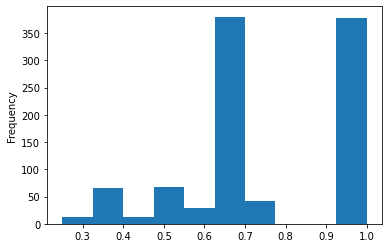

In [8]:
item_rel_df.max(axis=1).plot(kind='hist')

## Relation Clarity
*Relation clarity* is the maximum item-relation score for a relation among all items.  A relation clarity score of less than `1.0` means that throughout the
dataset the *relation* was never unanimously agreed to represent an item.

***Note:*** The `num_annotations` column represents the number of times a *relation* was used throughout the dataset. This is provided as helpful context for understanding the relation clarity scores (`rel_clarity`)

In [9]:
ct.relation_clarity_scores()

,rel_clarity,num_annotations
Other,1.00,1011.0
don't_vote_trump,1.00,515.0
trump_bad,1.00,501.0
trump_afraid,1.00,469.0
support_trump,1.00,222.0
trump_irresponsible,1.00,165.0
NoMeaning,1.00,122.0
trump_untrustworthy,1.00,110.0
trump_weak,0.75,75.0


# Worker Metrics

#### `CrowdTruth.get_worker_df(worker_id, include_worktime=False)`
for each worker, we can get a dataframe similar to `clarity_df` with only that workers contributions using their worker Id.
If desired, we can include the time it took to complete each task as well by adding `include_worktime=True`

In [10]:
example_worker_id = 'ATR6RB1RULOC0'

w_df = ct.get_worker_df(example_worker_id)
w_df.head()

,trump_bad,NoMeaning,Other,trump_untrustworthy,support_trump,don't_vote_trump,trump_afraid,trump_irresponsible,trump_weak
HITId,,,,,,,,,
301KG0KX9DZJQ5F4XJZ78S503L6H2A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301KG0KX9DZJQ5F4XJZ78S503L72HW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302OLP89D0LHE0ZSO6EL3JRI2HTAC1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302OLP89D0LHE0ZSO6EL3JRI2HTCA3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302U8RURJ0FKXSZHOREVFHZ7MV8NVX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Here is how to limit the dataframe to just the items that were labeled by the worker***

In [11]:
w_df[w_df.sum(axis=1) > 1].head()

,trump_bad,NoMeaning,Other,trump_untrustworthy,support_trump,don't_vote_trump,trump_afraid,trump_irresponsible,trump_weak
HITId,,,,,,,,,
30Y6N4AHYQAJI9RNQDVIIFYANLTRDQ,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
338431Z1FMTAM6ICGM9YT9A9RZ0ORK,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
338GLSUI44PSH85WW8QDWP6RL0SFSD,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36GJS3V78W45W5I1KYNHM9FGQWFJG0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
39TX062QX225XDB26NVYUOYMXPPX3U,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### `CrowdTruth.avg_annotations_per_item(w_df)`

Retrieves the average number of annotations provided by a worker. This can help to understand how often a worker applies more than 1 label. 

Depending on the task, this may or may not be desired behavior.

In [12]:
ct.avg_annotations_per_item(w_df)

2.1666666666666665

## Worker Agreement Metrics
Worker agreement metrics are the subject of a lot of debate (PUT LINKS HERE).

### Worker-Worker Agreement (Asymmetric)
One way to calculate the amount of agreement between to workers is to take the number of times that 
both workers attributed the same relation to the same item for all items that they both labeled and divide it by the number of times an annotation was provided by a worker. In a sense, this is a basic accuracy measure (number correct divide by total number of guesses).

In [13]:
example_w_id1='ATR6RB1RULOC0'
example_w_id2="AEF601SQFOSBL"

w_df1 = ct.get_worker_df(example_w_id1)
w_df2 = ct.get_worker_df(example_w_id2)

ct.asym_worker_agreement(w_df1, w_df2)

0.6333333333333333

***NOTE:*** A minimum number of common items can be imposed by using the `mimimum_common` parameter 
to vary the confidence in these agreement measures. 
If a pair of workers has less common items than the value of `minimum_common`, then a `NaN` value is returned.

You can also use the `CrowdTruth.items_in_common()` function to get the total number of items that both workers have labeled.

In [14]:
ct.items_in_common(w_df1, w_df2)

110

### Average Worker-Worker Agreement `CrowdTruth.avg_asym_worker_agreement()`
This score is the average of a worker's agreement (`asym_worker_agreement`) with all other workers.

In [15]:
ct.avg_asym_worker_agreement(example_w_id1)

0.6673487913683993

***NOTE:*** To get the full distribution of agreements, set the `full_series` parameter to `True`

In [16]:
ct.avg_asym_worker_agreement(example_w_id1, full_series=True)

0     1.000000
1     0.633333
2     0.861111
3     0.617647
4     0.733333
5     0.285714
6          NaN
7     0.875000
8     0.000000
9     1.000000
10         NaN
11         NaN
12         NaN
dtype: float64

### Worker-Item Similarity `CrowdTruth.worker_item_sim(w_df, item_ind)`
This metric is the cosine similarity of a single worker's relation vector for an item with the aggregated responses of all other workers for that item.
A high value for this metric means that the worker generally agrees with the crowd on this particular item. A `NaN` is returned if the worker did not label this item.

In [17]:
example_w_ind=w_df1[w_df1.sum(axis=1) > 0].index[0]
ct.worker_item_sim(w_df1, example_w_ind)

0.7071067811865475

### Worker-Item Disagreement `CrowdTruth.worker_item_disagreement(w_df, item_ind)`
***Worker-Item disagreement*** is inverse of the ***worker-item similarity*** metric normalized by the ***item-clarity*** score. This allows us to identify situations where a worker's annotation can be close the mean of the annotations provided by other workers, but if the variance of those annotations is generally high, then the score will still be low.

In [18]:
ct.worker_item_disagreement(w_df, example_w_ind)

-0.04044011451988083

### Average Worker-Item Disagreement `CrowdTruth.avg_worker_item_disagreement(w_df)`
This is the average of the ***worker-item disagreement*** scores. A low score here means that the worker generally disagreed with their peers with regard to each of the items OR that the items generally had low clarity. To distinguish, it is helpful to also look at ***item clarity*** scores and the scores of ***average worker-item disagreement scores*** of all the other workers too.

A negative score means that the worker has not only often diverged from their peers, but also that the items they labeled were not often clear either.

#### CAUTION: This method is not very well vetted and I think it may be a confusing metric to use. Use at your own risk!

In [19]:
ct.avg_worker_item_disagreement(w_df)

-0.029879396664175613

In [20]:
from tqdm.auto import tqdm
import pandas as pd

In [21]:
results = []

for w_id in tqdm(ct.get_all_worker_ids()):
    w_df = ct.get_worker_df(w_id)
    result = {'worker_id':w_id, 'score':ct.avg_worker_item_disagreement(w_df)}
    results.append(result)
results_df = pd.DataFrame(results)

In [22]:
results_df.sort_values(by='score', ascending=False)

,worker_id,score
1,AEF601SQFOSBL,0.186597
3,A1IHI23KH87K5W,0.082038
11,A1V6CP5I0TOSAR,0.081365
10,A3IR7DFEKLLLO,0.074606
5,A171S8E9IFSHH2,0.059087
6,A3J2UG22S8BIW4,0.055952
4,A2YE7NBCK14VAQ,0.011953
9,A2JPOXYZM5AJZZ,0.000000
7,A1S88VQY8G8CNC,-0.013495
2,A2HM35CWB7IIFM,-0.017436
